In [1]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# 2. Data Preparation (replace 'your_data.csv' with your actual file)
df = pd.read_csv('energy_data.csv')  # Update with your actual data file

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])  # Convert timestamp
df = df.dropna()                                   # Drop missing values
df = df.set_index('timestamp')                     # Set timestamp as index

In [4]:
# 3. Feature Selection & Scaling
X = df[['energy_consumption', 'temperature']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# 4. Elbow Method to find optimal number of clusters
wcss = []
for i in range(1, 4):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

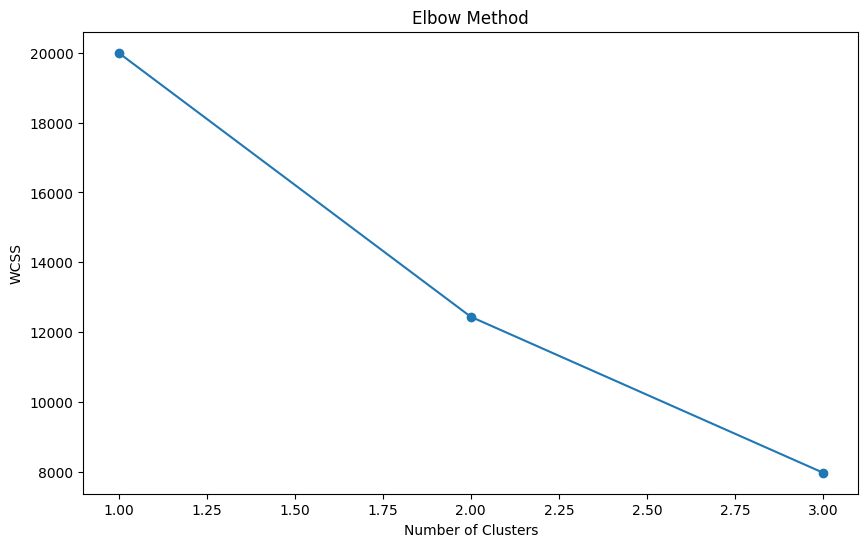

In [23]:
# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 4), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
# 5. Apply KMeans with optimal clusters (assume k=3 from elbow curve)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [14]:
# 6. Silhouette Score
silhouette_avg = silhouette_score(X_scaled, df['cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.41


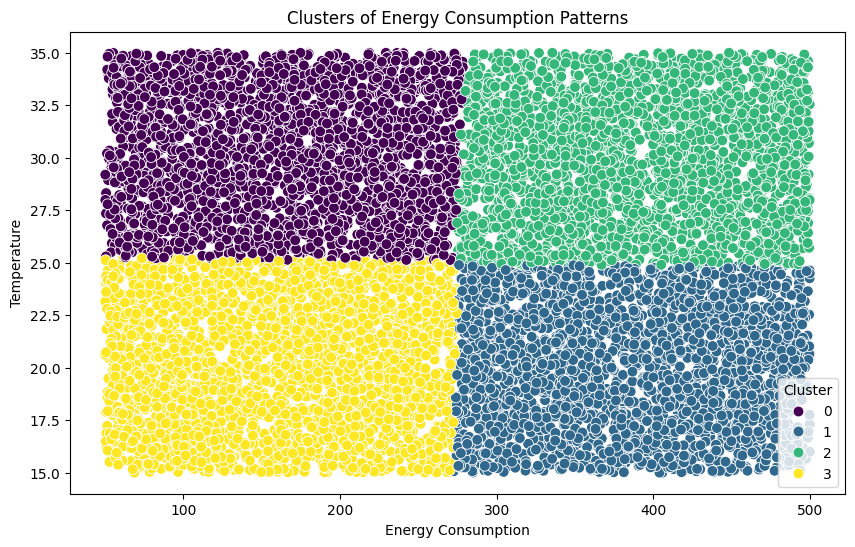

In [15]:

# 7. Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy_consumption', y='temperature', 
                hue='cluster', data=df, palette='viridis', s=60)
plt.title('Clusters of Energy Consumption Patterns')
plt.xlabel('Energy Consumption')
plt.ylabel('Temperature')
plt.legend(title='Cluster')
plt.show()